# Title
[]()

In [2]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\src")
from silvhua import *

In [14]:
from processing_functions import *
from plot_functions import *
from capstone_modelling import *
from model_eval_plot import plot_cv_metrics

# Load Data

In [29]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data'
df_sm = load_csv('data_sm.csv',path, column1_as_index=False)
df_fw = load_csv('data_freeweight_corrected.csv',path, column1_as_index=False)

Dataframe shape:  (52, 15)
Dataframe shape:  (52, 15)


# Feature engineering

In [5]:
loads = [20, 40, 60, 80, 90]
unique_load_pairs = create_pairs(loads)
unique_load_pairs.append([40, 60, 80])
unique_load_pairs.append([40, 60, 80, 90])
unique_load_pairs

Number of unique pairs: 10


[[20, 40],
 [20, 60],
 [20, 80],
 [20, 90],
 [40, 60],
 [40, 80],
 [40, 90],
 [60, 80],
 [60, 90],
 [80, 90],
 [40, 60, 80],
 [40, 60, 80, 90]]

In [6]:
model_names = []
for load_pair in unique_load_pairs:
    name = 'LV '+'-'.join([str(item) for item in load_pair])
    model_names.append(name)
model_names

['LV 20-40',
 'LV 20-60',
 'LV 20-80',
 'LV 20-90',
 'LV 40-60',
 'LV 40-80',
 'LV 40-90',
 'LV 60-80',
 'LV 60-90',
 'LV 80-90',
 'LV 40-60-80',
 'LV 40-60-80-90']

In [19]:
# Create dataframes with engineered features: SM
df_sm_dict = dict()
for index, model in enumerate(model_names):
    df_sm_dict[model] = individual_regression2(df_sm, unique_load_pairs[index])
df_sm_dict.keys()

Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)


dict_keys(['LV 20-40', 'LV 20-60', 'LV 20-80', 'LV 20-90', 'LV 40-60', 'LV 40-80', 'LV 40-90', 'LV 60-80', 'LV 60-90', 'LV 80-90', 'LV 40-60-80', 'LV 40-60-80-90'])

In [20]:
df_sm_dict['LV 20-40'].head()

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,42.0,84.0,126.0,168.0,189.0,210.0,1.05,0.92,0.72,0.51,0.40,0.28,-323.076923,381.230769,0.255577
1,21.0,71.6,179.0,30.0,60.0,90.0,120.0,135.0,150.0,1.06,0.90,0.67,0.50,0.38,0.26,-187.500000,228.750000,0.255577
2,19.0,60.8,165.0,30.0,60.0,90.0,120.0,135.0,150.0,1.09,0.92,0.74,0.48,0.36,0.24,-176.470588,222.352941,0.255577
3,21.0,58.4,172.0,24.0,48.0,72.0,96.0,108.0,120.0,1.07,0.91,0.73,0.53,0.42,0.27,-150.000000,184.500000,0.255577
4,20.0,82.3,185.0,35.0,70.0,105.0,140.0,157.5,175.0,1.03,0.91,0.70,0.51,0.38,0.29,-291.666667,335.416667,0.255577


In [21]:
df_sm_dict['LV 20-80'].head()

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,42.0,84.0,126.0,168.0,189.0,210.0,1.05,0.92,0.72,0.51,0.40,0.28,-233.333333,287.000000,0.255577
1,21.0,71.6,179.0,30.0,60.0,90.0,120.0,135.0,150.0,1.06,0.90,0.67,0.50,0.38,0.26,-160.714286,200.357143,0.255577
2,19.0,60.8,165.0,30.0,60.0,90.0,120.0,135.0,150.0,1.09,0.92,0.74,0.48,0.36,0.24,-147.540984,190.819672,0.255577
3,21.0,58.4,172.0,24.0,48.0,72.0,96.0,108.0,120.0,1.07,0.91,0.73,0.53,0.42,0.27,-133.333333,166.666667,0.255577
4,20.0,82.3,185.0,35.0,70.0,105.0,140.0,157.5,175.0,1.03,0.91,0.70,0.51,0.38,0.29,-201.923077,242.980769,0.255577


In [30]:
# Create dataframes with engineered features: FW
df_fw_dict = dict()
for index, model in enumerate(model_names):
    df_fw_dict[model] = individual_regression2(df_fw, unique_load_pairs[index])

Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)


# Modelling: Smith machine data


LV 20-40 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			21.28		55.53		-34.24
MAE: 			16.89		40.52		-23.63
mean error: 		-0.00		36.63		-36.63
R^2: 			0.51		-2.33		2.84
Pearson r statistic: 	0.71		0.62		0.10
			p=0.00		p=0.00

predictions mean: 	164.22		200.85		-36.63
predictions std: 	21.75		53.58		-31.83

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 1.3836519515656456
	LV intercept: 1.5348308570563958
	model intercept:  60.15251159873682
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/models/05 iteration SM LV 20-40.sav

LV 20-60 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			12.54		22.00		-9.45
MAE: 			10.05		17.09		-7.04
mean error: 		-0.00		14.78		-14.78
R^2: 			0.83		0.48		0.35
Pearson r statistic: 	0.91		0.89		0.02
			p=0.00		p=0.00

predictions mean: 	164.22		179.00		-14.78
predictions std: 	27.72		36.14		-8.42

target mean: 164.22
target std: 30.73

Model fe

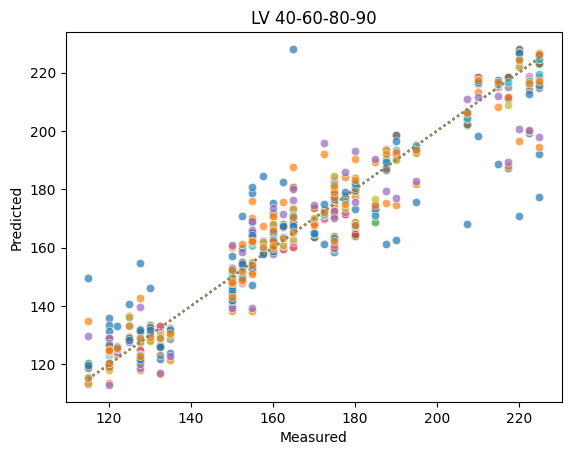

In [22]:
# linear regression on Smith machine data
predictions_sm, metrics_sm, model_dict_sm = batch_model(model_names, df_sm_dict, pickle_name='05 iteration SM')

## Evaluate 

In [23]:
cv_mae_sm, cv_r2_sm = batch_run_cv(model_names, df_sm_dict, LinearRegression())
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\model metrics'
save_csv(cv_mae_sm, '05_iteration_cv_mae_sm', path)
save_csv(cv_r2_sm, '05_iteration_cv_r2_sm', path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/05_iteration_cv_mae_sm.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/05_iteration_cv_r2_sm.csv


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


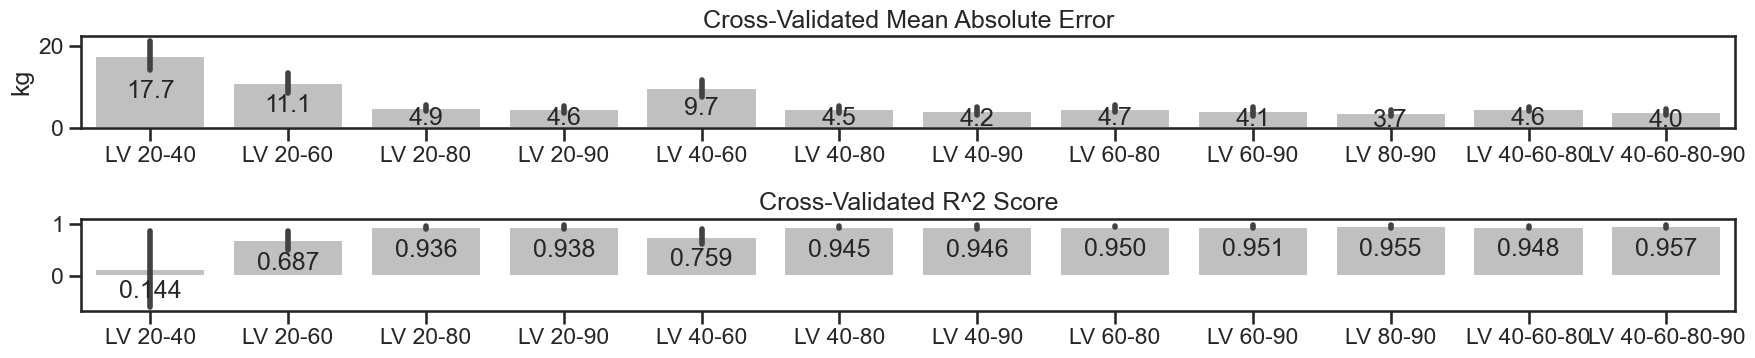

In [27]:
sns.reset_defaults()    
sns.set_theme(context='talk', style='ticks')
%matplotlib inline
plot_cv_metrics(cv_mae_sm, cv_r2_sm).savefig(
'../output/figures/05_iteration_CV_metrics_SM_ALL_MODELS.png.png')

# RandomForest

## Hyperparameter tuning

In [32]:
df = df_fw_dict['LV 40-60-80']
df.head()

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26,-197.674419,260.302326,0.275192
1,21.0,71.6,179.0,24.0,48.0,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27,-113.941221,150.999246,0.275192
2,19.0,60.8,165.0,26.0,52.0,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26,-124.824356,169.121780,0.275192
3,21.0,58.4,172.0,20.0,40.0,60.0,80.0,90.0,100.0,0.97,0.85,0.68,0.50,0.38,0.26,-114.254625,137.312296,0.275192
4,20.0,82.3,185.0,30.0,60.0,90.0,120.0,135.0,150.0,1.02,0.92,0.76,0.50,0.40,0.29,-140.207715,191.884273,0.275192


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': np.arange(5, 30, 5),
    'max_depth': np.arange(2,8,1)
}

def run_gridsearch(param_grid, df=df, x_columns=['slope', 'intercept']):
    X = df[x_columns]
    y = df['Load-1RM-1']
    estimator = RandomForestRegressor(random_state=0, criterion='absolute_error')
    gs = GridSearchCV(estimator, param_grid=param_grid, cv=10)
    gs.fit(X, y)
    print(f'Best hyperparameters: {gs.best_params_}')
    try:
        mae, r2 = cv_mae_r2(df, gs.best_estimator_, x_columns=x_columns)
        print(f'Mean absolute error: {np.mean(mae)}')
        print(f'R^2: {np.mean(r2)}')
    except:
        print('unable to score')
    return gs

gs = run_gridsearch(param_grid, df=df)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 20}
Mean absolute error: 4.8545833333333315
R^2: 0.8912692365375655


In [54]:
df = df_fw_dict['LV 20-90']
gs2 = run_gridsearch(param_grid, df=df)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 25}
Mean absolute error: 4.152466666666667
R^2: 0.9286873307874002


In [55]:
# Even with hyperparameter tuning, RandomForest models did not perform as well as 
# LinearRegression models

## Cross validate for all combinations of loads

In [56]:
cv_mae_rf, cv_r2_rf = batch_run_cv(model_names, df_fw_dict, gs.best_estimator_)
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\model metrics\random forest cv metrics'
save_csv(cv_mae_rf, '05_iteration_cv_mae_rf', path)
save_csv(cv_r2_rf, '05_iteration_cv_r2_rf', path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/random forest cv metrics/05_iteration_cv_mae_rf.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/random forest cv metrics/05_iteration_cv_r2_rf.csv


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


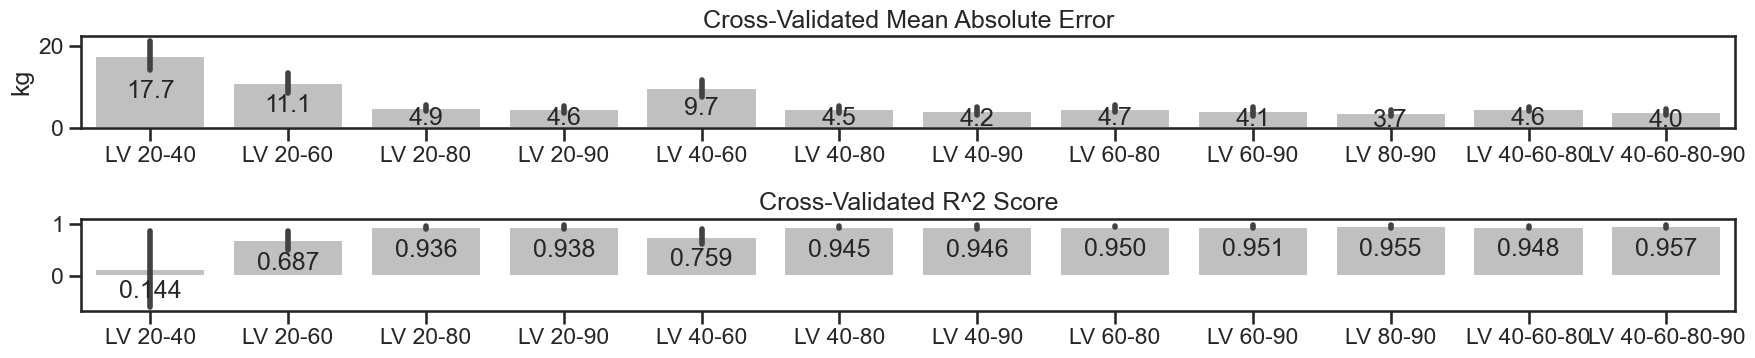

In [57]:
sns.reset_defaults()    
sns.set_theme(context='talk', style='ticks')
%matplotlib inline
filename = '05 iteration CV metrics RandomForest maxdepth_7 n_estimators20.png'
plot_cv_metrics(cv_mae_sm, cv_r2_sm).savefig(
'../output/figures/randomforest/'+filename)

In [58]:
savepickle(gs, '05 iteration GridSearchCV result', path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\pickled models\randomforestregressor')

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/pickled models/randomforestregressor/05 iteration GridSearchCV result.sav


# *End of Page*